## Click Through Rate Prediction Assignment

### Data Loading and Clean-up

In [1428]:
#Import required packages


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import math

import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score


from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import random



from sklearn.metrics import ConfusionMatrixDisplay

sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', 0)
pd.options.display.float_format = '{:.2f}'.format


In [1429]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [1430]:
data = pd.read_csv('data.csv')
data.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1


In [1431]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [1432]:
#month column seem to have same value
data.month.unique()

array([10])

In [1433]:
data.click.unique()

array([False,  True])

In [1434]:
data.drop(['month'], axis=1,inplace=True)

In [1435]:
# size of the dataframe
print('Data Size is - ' + str(data.shape))

Data Size is - (99999, 26)


In [1436]:
data.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'dayofweek', 'day', 'hour', 'y'],
      dtype='object')

In [1437]:
# Let's first check the data for null values
data.isna().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

### Let's check the feature relationships

In [1438]:
def showCountValuesOnBarChart(axis) :
    #Show the count values on the bar charts
    for p in axis.patches:
        axis.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

def plotMultiBarChart(feature,hue_value,title1,title2,pallette_code) :
    plt.figure(figsize = (13,5))
    plt.subplot(1,2,1)
    ax = sns.countplot(x=data[feature], palette=pallette_code)
    plt.title(title1)
    plt.subplot(1,2,2)
    ax2 = sns.countplot(x=data[feature], hue = data[hue_value], palette=pallette_code)
    plt.title(title2)

    showCountValuesOnBarChart(ax)
    showCountValuesOnBarChart(ax2)
    plt.show()


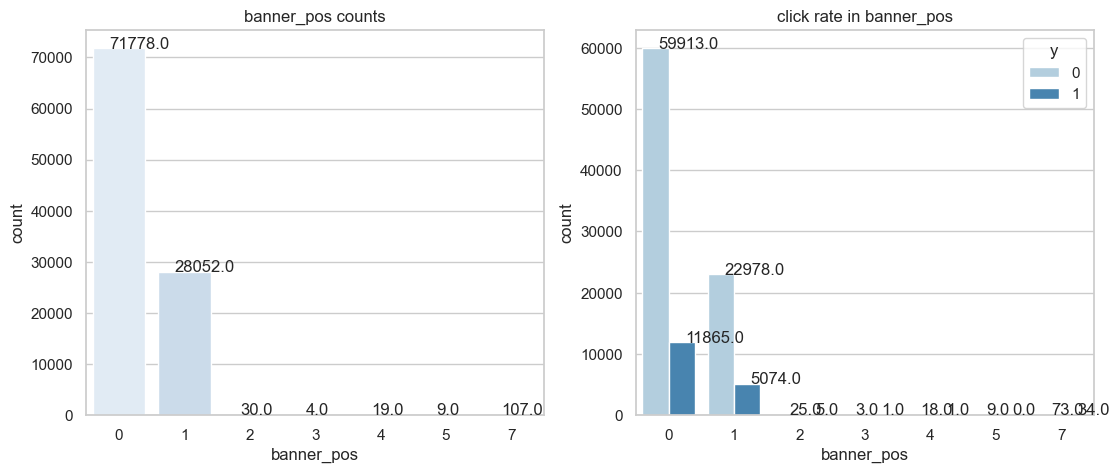

In [1439]:
plotMultiBarChart('banner_pos','y','banner_pos counts','click rate in banner_pos','Blues')

    The banner position variable in the dataset is highly imbalanced. 71,778 addvertisements are in position zero. 28,052 advertisements are in position 1.
    Position 0 has 59,913 clicks and 11,865 no clicks of total 71,778. Position 1 has 22,978 clicks and  5,074 non clicked ads

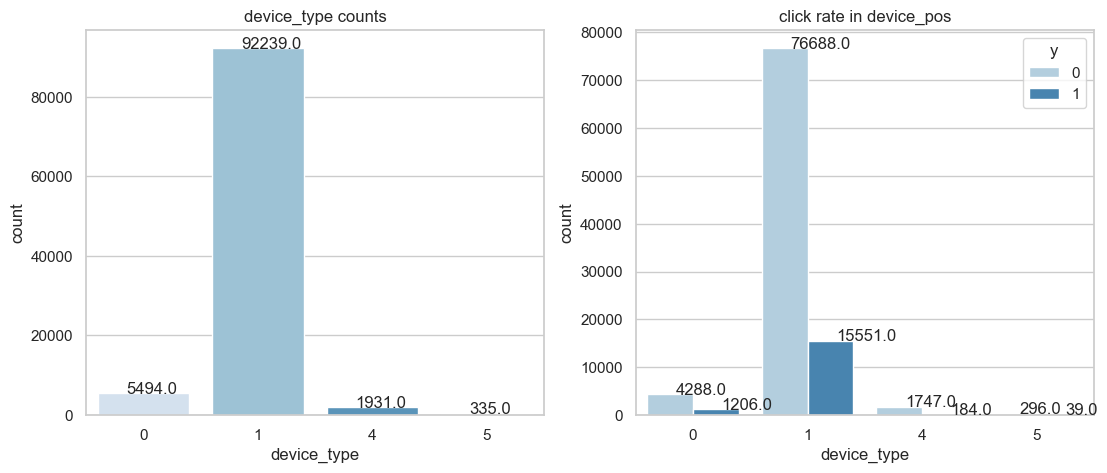

In [1440]:
plotMultiBarChart('device_type','y','device_type counts','click rate in device_pos','Blues')


    Mostly used device_type is 1.

    This device_type 1 has lead to majority of advertisements of around 87,000 with 76688 clicked and 15551 non clicked

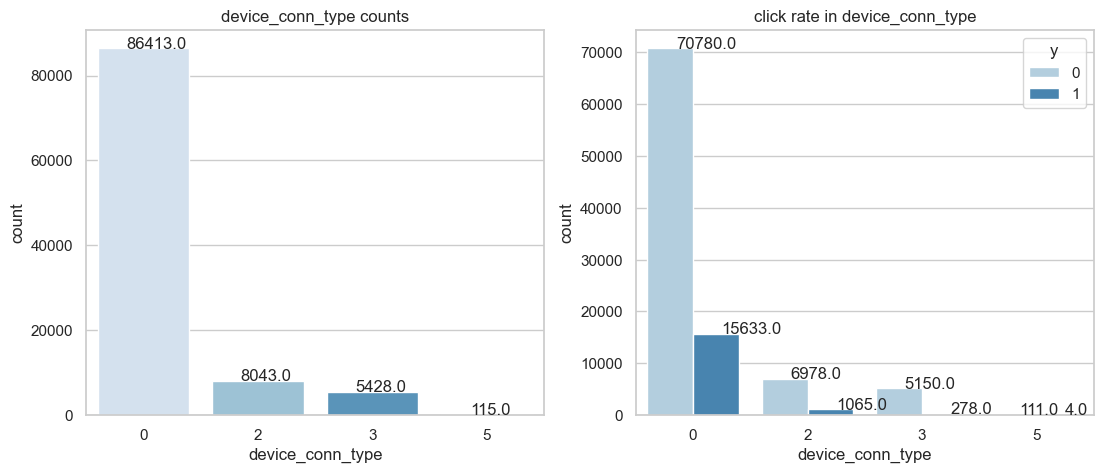

In [1441]:
plotMultiBarChart('device_conn_type','y','device_conn_type counts','click rate in device_conn_type','Blues')


    Connection Type 0 is majorly used and most of the clicks came from connection type 0

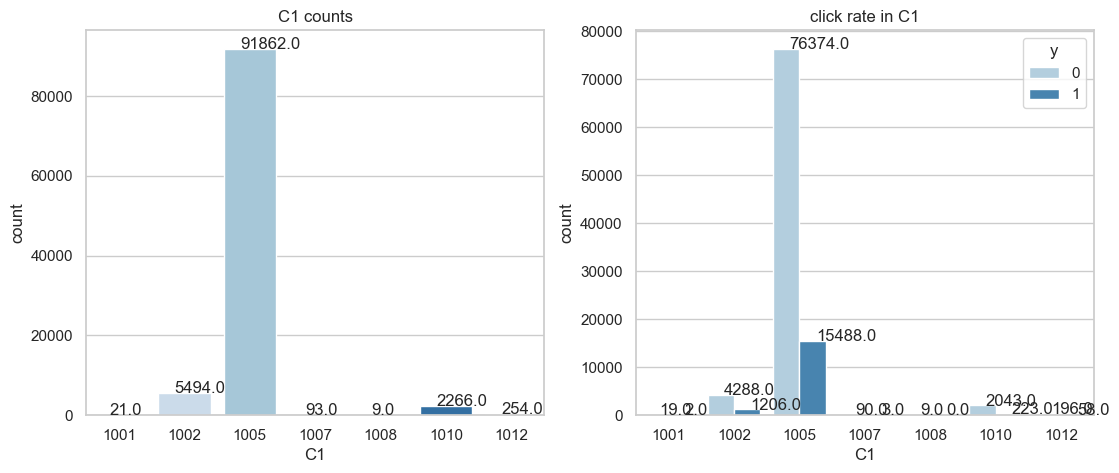

In [1442]:
plotMultiBarChart('C1','y','C1 counts','click rate in C1','Blues')

    Most of the clicks are coming from C1 Category counting 91862

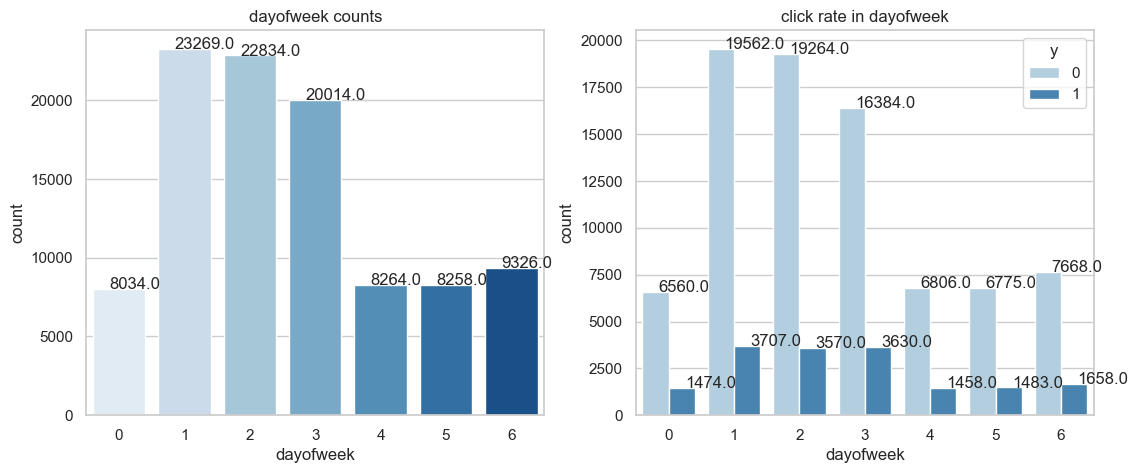

In [1443]:
plotMultiBarChart('dayofweek','y','dayofweek counts','click rate in dayofweek','Blues')

    Most of the clicks are coming on weekdays Monday, Tuesday and Wednesday

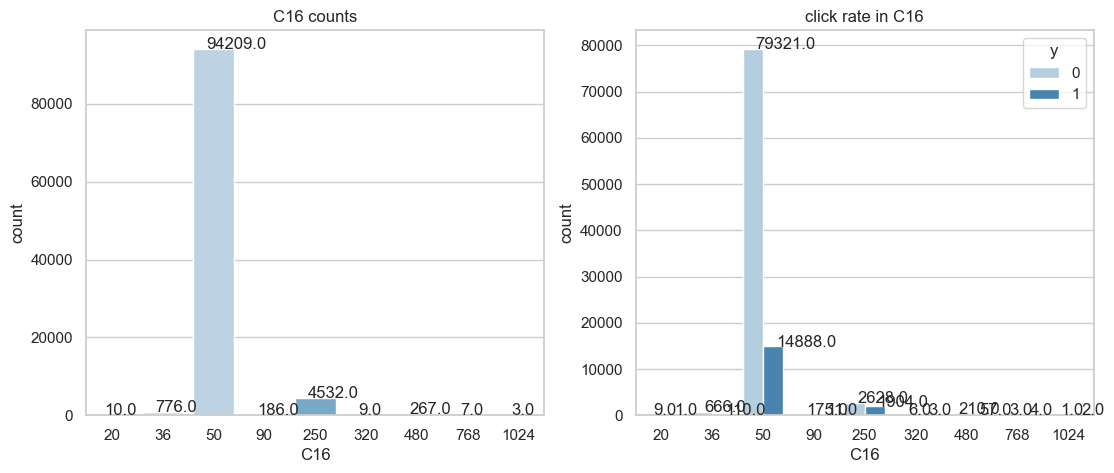

In [1444]:
plotMultiBarChart('C16','y','C16 counts','click rate in C16','Blues')

    C16 Category has most of the clicks comign from type 50

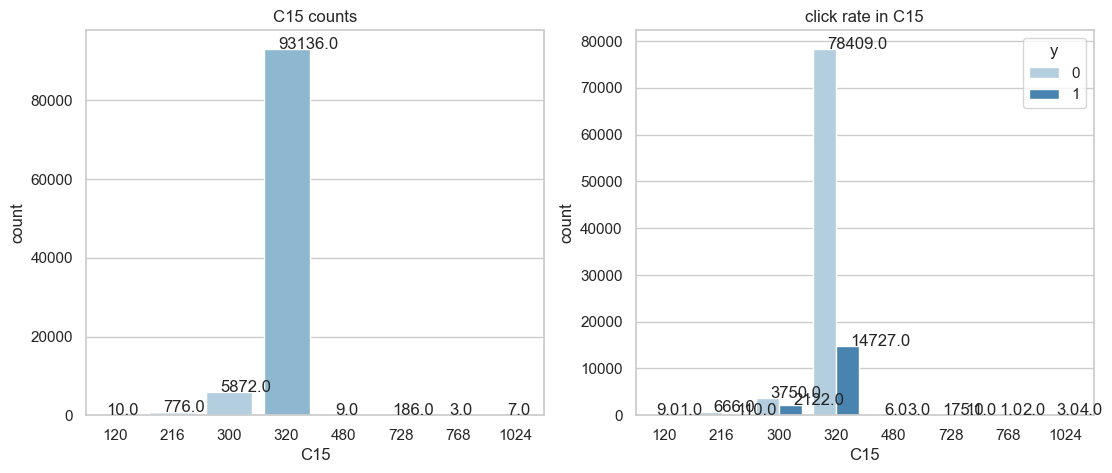

In [1445]:
plotMultiBarChart('C15','y','C15 counts','click rate in C15','Blues')


    C15 Category has most of the clicks comign from type 320

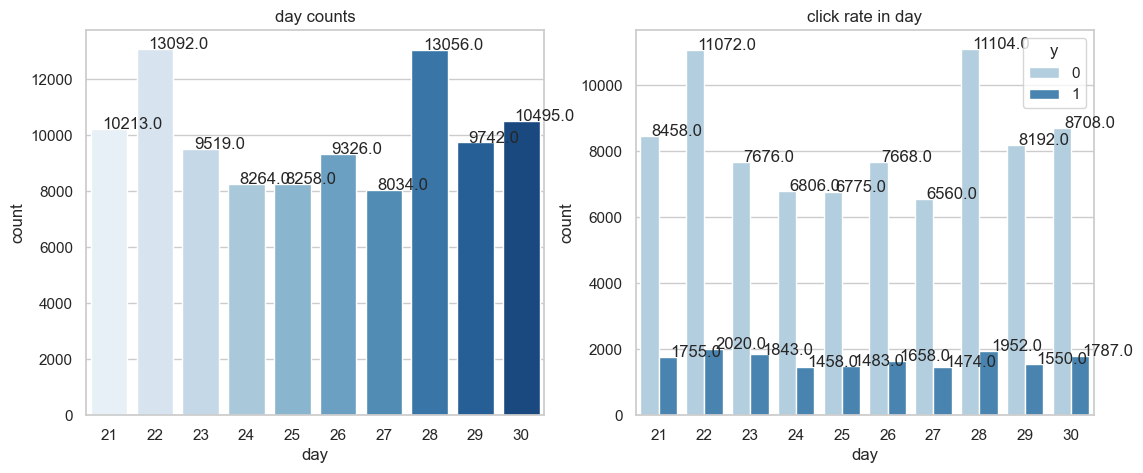

In [1446]:
plotMultiBarChart('day','y','day counts','click rate in day','Blues')


    The successful clicks are consistent across days

<function matplotlib.pyplot.show(close=None, block=None)>

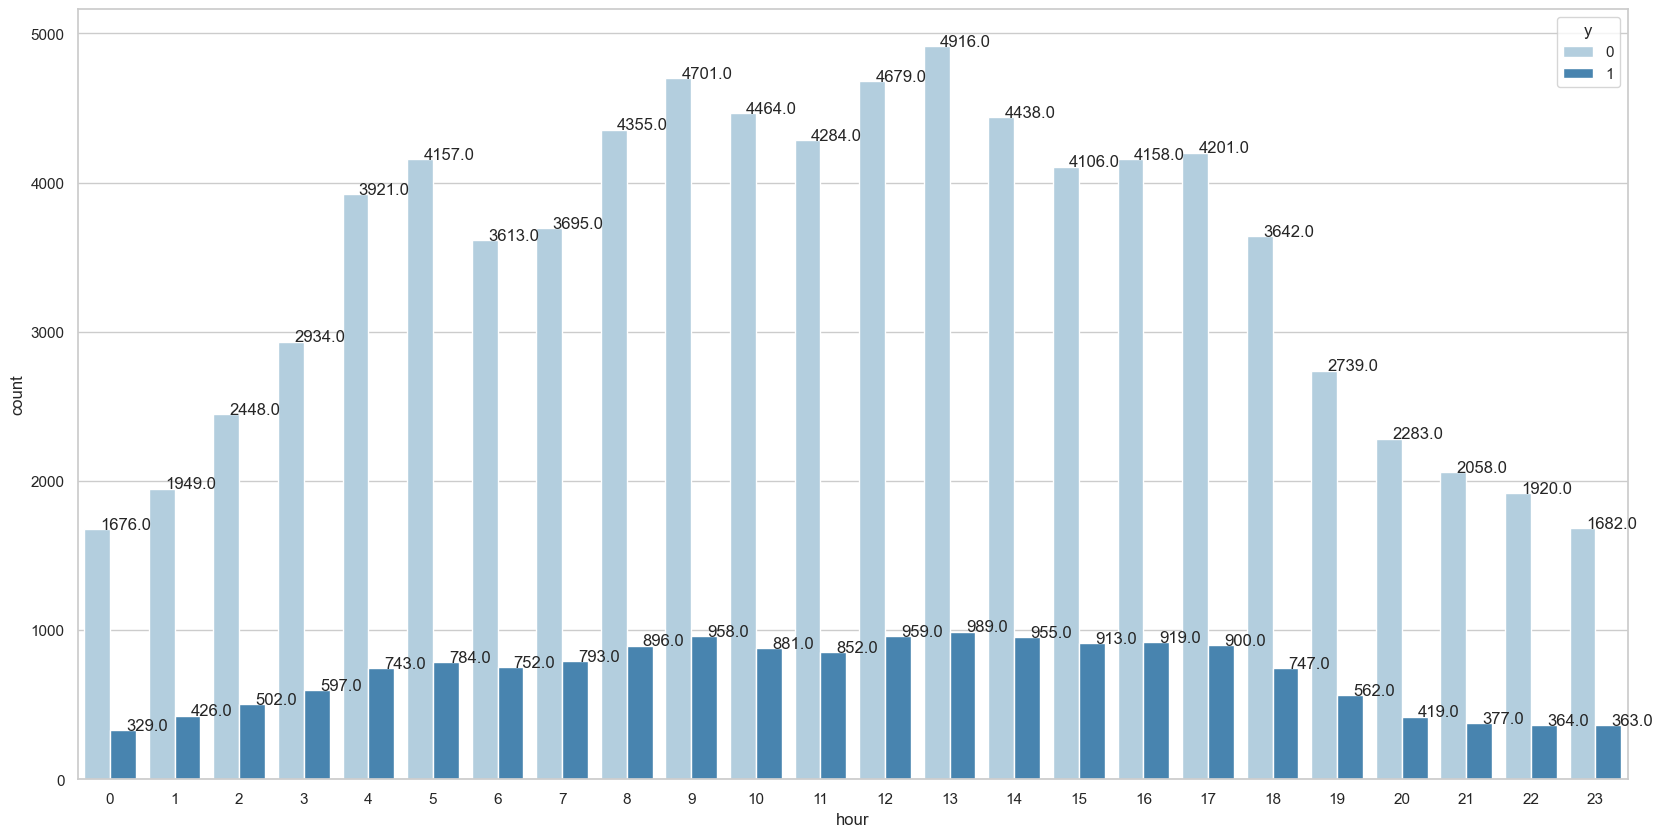

In [1447]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='hour',hue='y',data=data, palette="Blues")
showCountValuesOnBarChart(ax)
plt.show

    Most of the ads are clicked during 8AM to 5PM

### 1. Perform missing value and outlier treatment, if needed, in the data set you received.

In [1448]:
# check for outliers
data.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,dayofweek,day,hour,y
count,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00
mean,1004.97,0.29,1.02,0.33,18857.23,318.83,60.28,2114.61,1.44,227.23,53292.00,83.16,2.59,25.49,11.30,0.17
std,1.09,0.51,0.53,0.85,4944.92,21.51,47.71,607.47,1.33,351.47,49952.34,70.16,1.72,2.97,5.94,0.38
min,1001.00,0.00,0.00,0.00,375.00,120.00,20.00,112.00,0.00,33.00,-1.00,1.00,0.00,21.00,0.00,0.00
25%,1005.00,0.00,1.00,0.00,16920.00,320.00,50.00,1863.00,0.00,35.00,-1.00,23.00,1.00,23.00,7.00,0.00
50%,1005.00,0.00,1.00,0.00,20346.00,320.00,50.00,2323.00,2.00,39.00,100050.00,61.00,2.00,26.00,11.00,0.00
75%,1005.00,1.00,1.00,0.00,21893.00,320.00,50.00,2526.00,3.00,171.00,100093.00,101.00,4.00,28.00,16.00,0.00
max,1012.00,7.00,5.00,5.00,24043.00,1024.00,1024.00,2757.00,3.00,1839.00,100248.00,255.00,6.00,30.00,23.00,1.00


#### Above columns  C15, C16, C19, C21 can have outliers.  Let's plot and cross check it.

In [1449]:
#Define the function to plot the box plots
def boxPlotColumns(columns,dataframe) :
    ix, axs = plt.subplots(ncols=len(columns))
    for i, col in enumerate(columns):
        sns.boxplot(data=dataframe[col], ax=axs[i], palette="Blues")

    plt.show()



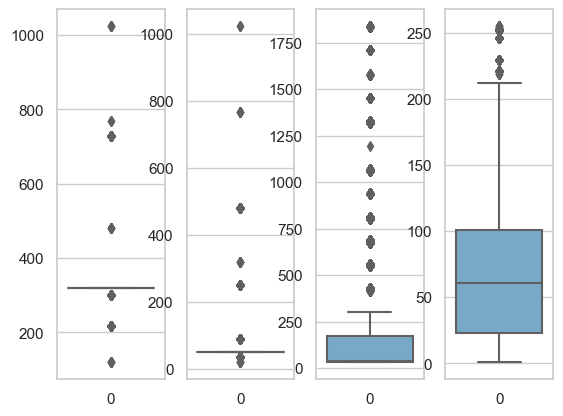

In [1450]:
# call the boxPlotColumns function
outlier_columns = ['C15', 'C16', 'C19', 'C21']
boxPlotColumns(outlier_columns,data)

#### These columns do have outliers. Let's cap the values to upper percentile.

In [1451]:
# define a function which will take list of colummns and dataframe to cap values
def capOutlierValues(columns, dataframe) :
    for column in columns:
        percentiles = dataframe[column].quantile(0.98)
        if dataframe[column].quantile(0.98) < 0.5 * dataframe[column].max():
            dataframe[column][dataframe[column] >= percentiles] = percentiles
    return dataframe

In [1452]:
#call outlier capping function
data = capOutlierValues(outlier_columns, data)

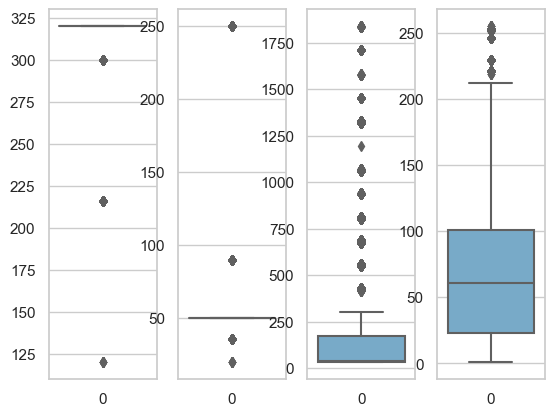

In [1453]:
boxPlotColumns(outlier_columns,data)

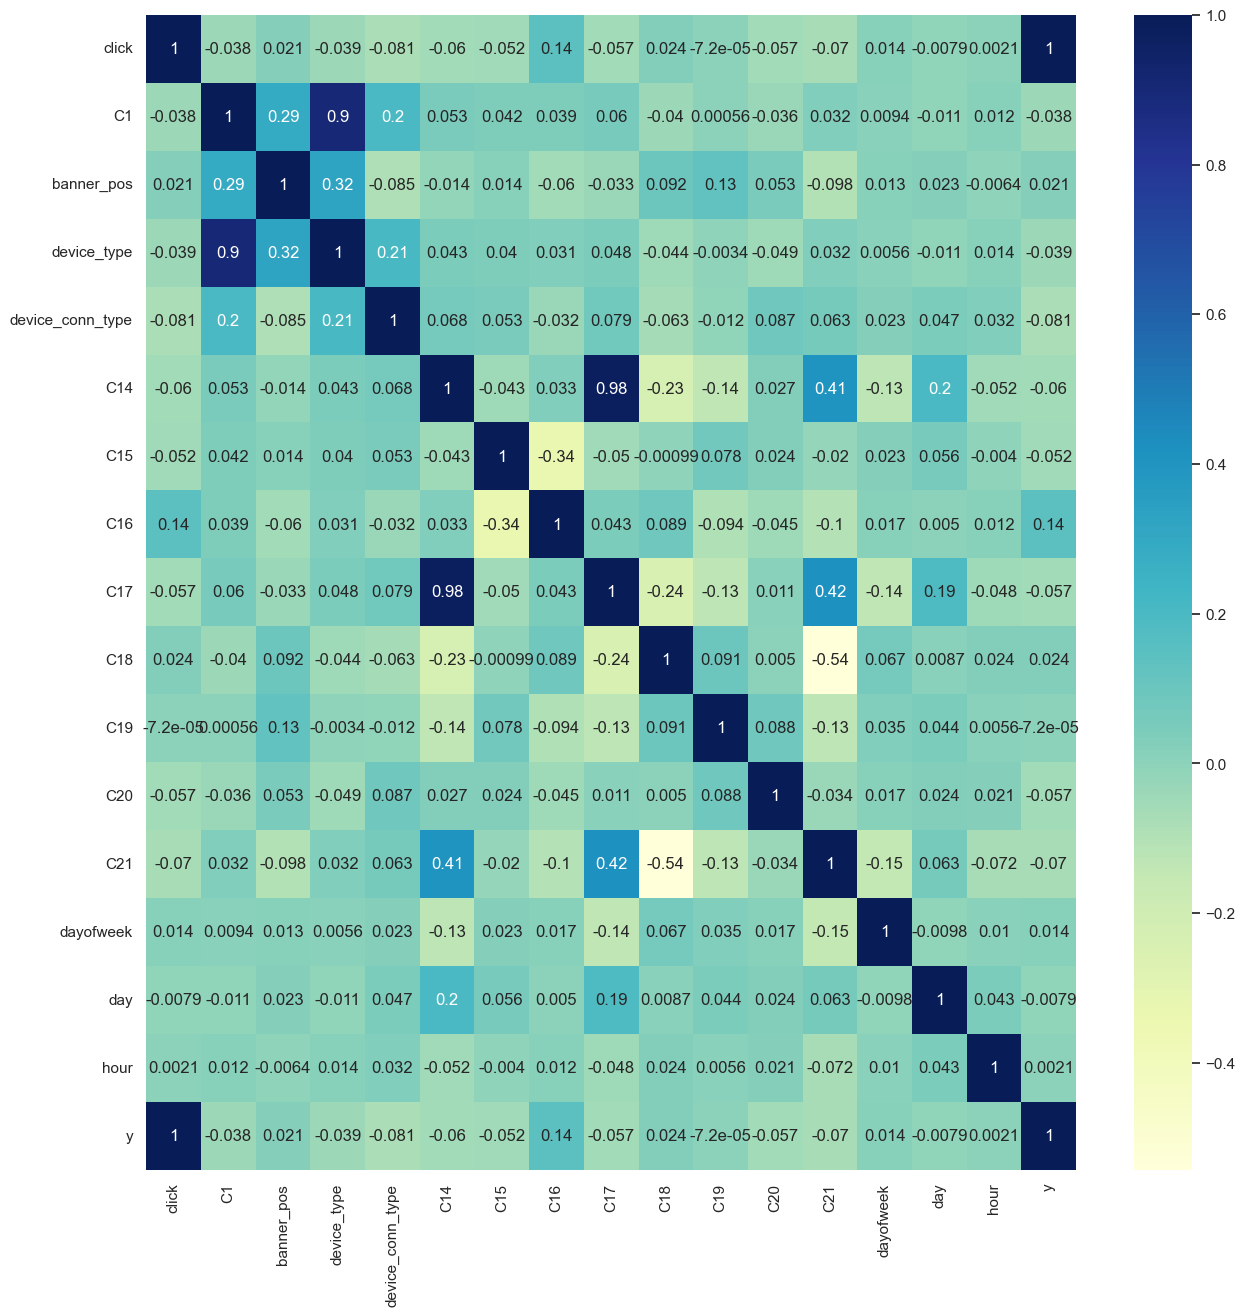

In [1454]:
#Let's check the correlation

cor = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

#### 
    we have already dropped the month column
    we can see that column 'y' and column 'click' are same so click can be dropeed
    device_type and c1 are very highly correlated and thus either can be dropped
    c14 and c17 are very highly correlated and thus either can be dropped

In [1455]:
data.drop([ 'device_type', 'click','C14'], axis=1, inplace=True)
data.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model',
       'device_conn_type', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'dayofweek', 'day', 'hour', 'y'],
      dtype='object')


-----

### 2. Perform categorical variable treatment:

    Identify the categorical columns 
    Use suitable techniques to treat these categorical columns. For instance, as explained earlier, the banner position is a categorical variable. 
#### Let's check the data types

In [1456]:
data.dtypes

C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_conn_type     int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
dayofweek            int64
day                  int64
hour                 int64
y                    int64
dtype: object

#### We can see that the target column click is a boolean and rest of the datatypes are 
boolean - click

int64 numerical type - C1, banner_pos, device_type, device_conn_type, C14, C15, C16, C17, C18, C19, C20, C21, dayofweek, day, hour, y

object categorical type - site_id, site_domain, app_id, app_domain, app_category, device_id, device_ip, device_model




#### Let's check the unique values in categorical data

In [1457]:
data['site_id'].value_counts()

85f751fd    36022
1fbe01fe    15862
e151e245     6597
d9750ee7     2376
5b08c53b     2305
            ...  
9e1b18be        1
27e10723        1
1661bb7f        1
1edf0277        1
bf991633        1
Name: site_id, Length: 1485, dtype: int64

In [1458]:
data['site_domain'].value_counts()

c4e18dd6    37362
f3845767    15862
7e091613     8280
7687a86e     3220
98572c79     2456
            ...  
babf5d87        1
a63817ea        1
8d450543        1
66cf2855        1
bde22369        1
Name: site_domain, Length: 1331, dtype: int64

In [1459]:
data['app_id'].value_counts()

ecad2386    63977
92f5800b     3865
e2fcccd2     2849
febd1138     1888
9c13b419     1867
            ...  
680d6760        1
a40fbb61        1
82a4d1ff        1
0890d0ba        1
a821a6b6        1
Name: app_id, Length: 1354, dtype: int64

In [1460]:
data['app_domain'].value_counts()

7801e8d9    67464
2347f47a    12893
ae637522     4701
5c5a694b     2850
82e27996     1889
            ...  
ead20d3d        1
2619a4f7        1
cb36afb8        1
ae36b8ab        1
63f57be0        1
Name: app_domain, Length: 96, dtype: int64

In [1461]:
data['app_category'].value_counts()

07d7df22    64769
0f2161f8    23644
cef3e649     4300
8ded1f7a     3519
f95efa07     2868
d1327cf5      315
dc97ec06      140
09481d60      129
75d80bbe       81
4ce2e9fc       67
fc6fa53d       58
a3c42688       32
879c24eb       22
4681bb9d       21
0f9a328c       13
a86a3e89        6
2281a340        6
8df2e842        5
7113d72a        2
a7fd01ec        1
79f0b860        1
Name: app_category, dtype: int64

In [1462]:
data['device_id'].value_counts()

a99f214a    82579
c357dbff       62
0f7c61dc       51
afeffc18       34
936e92fb       27
            ...  
125e25bb        1
244973fb        1
9ba711d4        1
60e04656        1
927c68c6        1
Name: device_id, Length: 16801, dtype: int64

In [1463]:
data['device_model'].value_counts()

8a4875bd    6041
1f0bc64f    3401
d787e91b    3373
76dc4769    1862
be6db1d7    1805
            ... 
1dbc394f       1
913bd042       1
1d222263       1
8932b0c5       1
c84e186e       1
Name: device_model, Length: 3145, dtype: int64

#### Based on the observation
    The categorical variable have lots of unique values in it. The one-hot encoding is not suitable in this case.
    We should use label encoding
    "Using one-hot encoding increases the dimensionality of the data set. Label encoding doesn't affect the dimensionality of the data set."

In [1464]:
X = data.drop(['y'], axis=1)
y = data['y']

In [1465]:
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, y)
X

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_conn_type,C15,C16,C17,C18,C19,C20,C21,dayofweek,day,hour
0,1005,1,0.03,0.03,0.18,0.20,0.19,0.20,0.17,0.17,0.19,0,320,50,2528,0,39,100075,221,1,28,14
1,1005,1,0.30,0.26,0.18,0.20,0.19,0.20,0.17,0.29,0.28,0,320,50,1934,2,39,-1,16,2,22,19
2,1005,0,0.05,0.03,0.21,0.20,0.19,0.20,0.17,0.17,0.08,0,320,50,2552,3,167,100202,23,3,23,18
3,1002,0,0.00,0.00,0.13,0.20,0.19,0.20,0.17,0.17,0.21,0,320,50,2478,3,167,100074,23,2,22,19
4,1005,0,0.20,0.20,0.21,0.20,0.19,0.20,0.17,0.17,0.22,0,320,50,1722,0,35,-1,79,1,21,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1005,0,0.17,0.16,0.28,0.20,0.19,0.20,0.17,0.17,0.20,0,320,50,1973,3,39,100148,23,3,23,15
99995,1005,0,0.20,0.20,0.21,0.20,0.19,0.20,0.17,0.05,0.21,0,320,50,2545,0,167,100084,221,2,29,0
99996,1005,0,0.12,0.13,0.13,0.20,0.19,0.10,0.17,0.40,0.21,0,320,50,2443,2,39,-1,23,2,22,15
99997,1005,0,0.46,0.46,0.28,0.20,0.19,0.20,0.17,0.41,0.23,0,300,250,2295,2,35,100081,23,5,25,8


-----

### 3. Perform a train-test split in the data set (the usual split followed in the industry is 70-30 or 80-20).

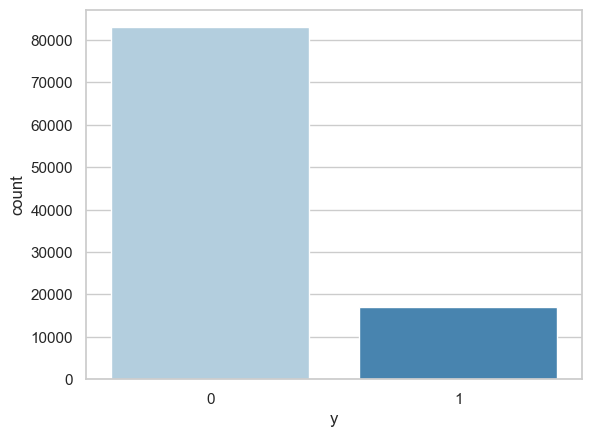

In [1467]:
# Let's check if the data is balanced
sns.countplot(x=y, palette="Blues")
plt.show()

##### We can clearly see that the data is not balanced. 
    An inbalanced training data could lead to model biased towards the higher number of records present.
    Let's balance the train data

In [1468]:
randomsample=  RandomOverSampler()
x_bal, y_bal = randomsample.fit_resample(X, y)


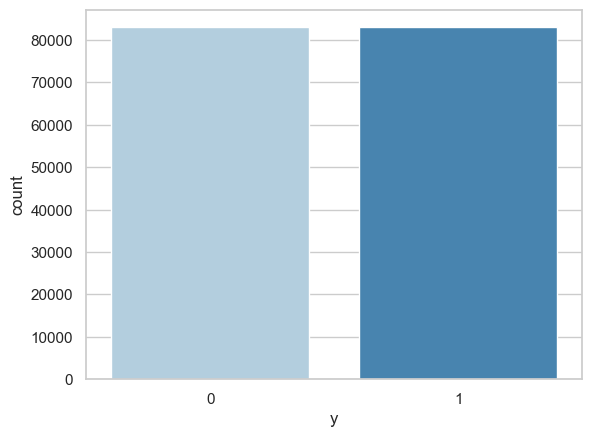

In [1469]:
# Plot and check
sns.countplot(x=y_bal, palette="Blues")
plt.show()

In [1470]:
# Let's Obtain the train test data
X_train, X_test, y_train, y_test = train_test_split(x_bal, y_bal, stratify= y_bal, test_size= 0.3, random_state= 42)

In [1471]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train


,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_conn_type,C15,C16,C17,C18,C19,C20,C21,dayofweek,day,hour
138890,0.82,0.14,0.12,0.14,0.22,0.10,0.32,0.40,0.22,0.26,0.13,0.60,1.00,0.13,0.61,0.00,0.00,0.00,0.31,0.00,0.67,0.39
12154,0.36,0.00,0.12,0.14,0.22,0.06,0.11,0.40,0.22,0.17,0.32,0.00,1.00,0.13,0.99,1.00,0.43,1.00,0.90,0.50,1.00,0.17
16971,0.36,0.00,0.12,0.14,0.22,0.09,0.23,0.36,0.22,0.17,0.31,0.40,1.00,0.13,0.97,0.00,0.00,1.00,0.87,0.17,0.78,0.48
114504,0.36,0.00,0.21,0.23,0.35,0.20,0.32,0.75,0.22,0.17,0.25,0.00,1.00,0.13,0.90,0.00,0.00,0.00,0.87,0.17,0.00,0.65
24685,0.36,0.00,0.12,0.14,0.22,0.13,0.18,0.40,0.22,0.17,0.13,0.00,1.00,0.13,0.82,1.00,0.01,1.00,0.16,0.00,0.67,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74935,0.36,0.14,0.05,0.06,0.30,0.20,0.32,0.75,0.22,0.17,0.00,0.00,1.00,0.13,0.64,1.00,0.07,1.00,0.09,0.00,0.67,0.22
8091,0.36,0.00,0.05,0.11,0.48,0.20,0.32,0.75,0.22,0.17,0.19,0.00,1.00,0.13,0.91,0.00,0.00,1.00,0.61,0.33,0.11,0.43
36046,0.36,0.00,0.43,0.51,0.48,0.20,0.32,0.75,0.22,0.01,0.31,0.00,0.90,1.00,0.71,0.67,0.00,1.00,0.13,0.17,0.78,0.04
34280,0.36,0.00,0.12,0.14,0.22,0.09,0.23,0.36,0.22,0.17,0.25,0.40,1.00,0.13,0.97,0.00,0.00,0.00,0.87,0.17,0.78,0.57


### 4. Identify the 3 classification methods you will use in the data set, and explain the reason you chose those 3 methods in the notebook file you will share in the submission process.

    we chose below three models and also reason given for these mdoel selection
    1. Logistic Regression - This will help find linear relationship and for better explainability
    2. Decision Tree - This will help find non-linear relationship and for better explainability
    3. Random Forest - This will help find non-linear relationship and for improving model accuracy

#### Let's build these models without  "model simplification techniques like feature creation and selection, to improve model predictability" since this we'll do later and comapare it



#### Functions required for model evaluation, cross validaiton, roc curve plotting and getting evaluation score as a dataframe records

In [1472]:
# Function to evaluate the model

def model_evaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    return accuracy, conf_matrix

In [1473]:
# Function for cross validation

def cross_val (model, x, y, folds):
    crossvalidation = cross_val_score(model, x, y, cv= folds, n_jobs=-1)
    return crossvalidation

In [1474]:
# Function for storing evaluation metrics

def plot_roc(model, Xtest, actual):
    y_test_pred = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve( actual, y_test_pred,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, y_test_pred )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [1475]:
# Function to get the evaluation score in a data frame record
def get_eval_score_df_entry(name, y_train, x_train, y_test, x_test, model, folds):
    
    crossvalidation = cross_val(model, x_train, y_train, folds)
    
    accuracy_test, cm1 =  model_evaluation(model, x_train, y_train)
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    recall_test = TP / (TP+FP)
    precision_test = TP / (TP+FN)
    
    accuracy_train, cm1 =  model_evaluation(model, x_test, y_test)
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    recall_train = TP / (TP+FP)
    precision_train = TP / (TP+FN)

    entry = {'model_name': [name],
          'accuracy_train': [accuracy_train],
          'recall_train': [recall_train],
          'precision_train': [precision_train],
          'accuracy_test': [accuracy_train],
          'recall_test': [recall_train],
          'precision_test': [precision_train],
          'cross_val_mean': [crossvalidation.mean()],           
          'cross_val_1': [crossvalidation[0]],
          'cross_val_2': [crossvalidation[1]],
          'cross_val_3': [crossvalidation[2]],
          'cross_val_4': [crossvalidation[3]],
          'cross_val_5': [crossvalidation[4]],
          }
    result = pd.DataFrame(entry)
    return result

#### Logistic Regression

In [1476]:
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000) 
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

0.7193648116919618
[[18082  6824]
 [ 7155 17751]]


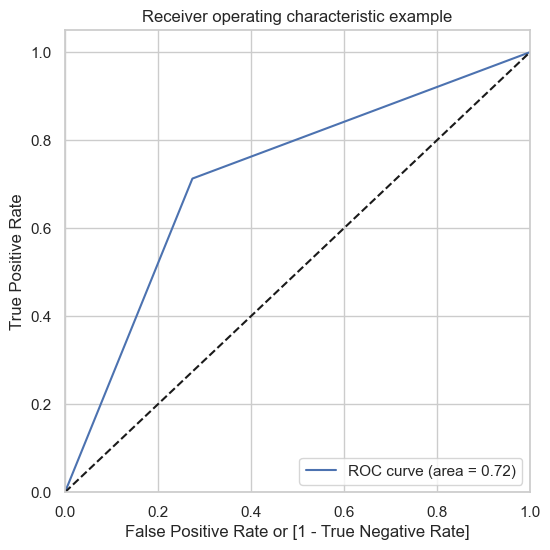

,model_name,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test,cross_val_mean,cross_val_1,cross_val_2,cross_val_3,cross_val_4,cross_val_5
0,Logistic Regression,0.72,0.72,0.71,0.72,0.72,0.71,0.72,0.72,0.72,0.72,0.72,0.72


In [1477]:
model_eval_scores = pd.DataFrame()
len(X_test)
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
y_pred = lr_model.predict(X_test)
accuracy, cnf_matrix = model_evaluation(lr_model, X_test, y_test)
print(accuracy)
print(cnf_matrix)
model_eval_df = get_eval_score_df_entry("Logistic Regression", y_train, X_train, y_test, X_test, lr_model, 5)
plot_roc(lr_model, X_test, y_test)
model_eval_scores = model_eval_scores.append(model_eval_df)
model_eval_scores

#### Decision Tree

0.8992812976792741
[[20537  4369]
 [  648 24258]]


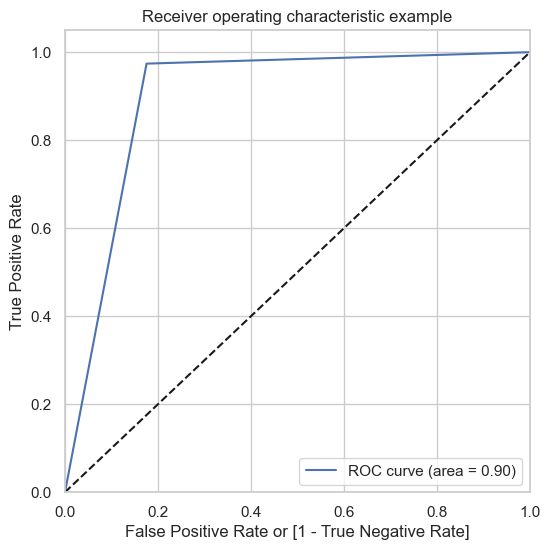

,model_name,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test,cross_val_mean,cross_val_1,cross_val_2,cross_val_3,cross_val_4,cross_val_5
0,Logistic Regression,0.72,0.72,0.71,0.72,0.72,0.71,0.72,0.72,0.72,0.72,0.72,0.72
0,Decision Tree,0.90,0.85,0.97,0.90,0.85,0.97,0.88,0.88,0.88,0.88,0.88,0.88


In [1478]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_preds = dt_model.predict(X_test)
accuracy, cnf_matrix = model_evaluation(dt_model, X_test, y_test)
print(accuracy)
print(cnf_matrix)
model_eval_df = get_eval_score_df_entry("Decision Tree", y_train, X_train, y_test, X_test, dt_model, 5)
plot_roc(dt_model, X_test, y_test)
model_eval_scores = model_eval_scores.append(model_eval_df)
model_eval_scores


#### Random Forest

0.9159238737653578
[[21273  3633]
 [  555 24351]]


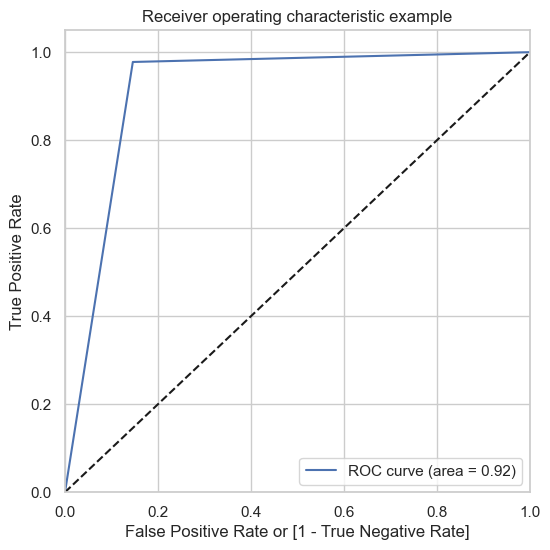

,model_name,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test,cross_val_mean,cross_val_1,cross_val_2,cross_val_3,cross_val_4,cross_val_5
0,Logistic Regression,0.72,0.72,0.71,0.72,0.72,0.71,0.72,0.72,0.72,0.72,0.72,0.72
0,Decision Tree,0.90,0.85,0.97,0.90,0.85,0.97,0.88,0.88,0.88,0.88,0.88,0.88
0,Random Forest,0.92,0.87,0.98,0.92,0.87,0.98,0.89,0.90,0.89,0.89,0.90,0.89


In [1479]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_preds = rf_model.predict(X_test)
accuracy, cnf_matrix = model_evaluation(rf_model, X_test, y_test)
print(accuracy)
print(cnf_matrix)
model_eval_df = get_eval_score_df_entry("Random Forest", y_train, X_train, y_test, X_test, rf_model, 5)
plot_roc(rf_model, X_test, y_test)
model_eval_scores = model_eval_scores.append(model_eval_df)
model_eval_scores

### 5. For all 3 methods, use appropriate evaluation metrics to assess model performance. Also, evaluate the models' basis the cross-validation.

#### Models trained and evaluated on the accuracy score, recall, precision and cross validation
    Let's plot the performance

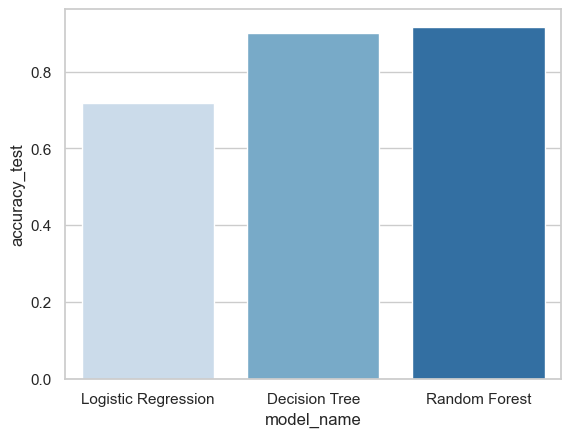

In [1480]:
sns.barplot(x="model_name", y="accuracy_test", data=model_eval_scores, palette="Blues")
plt.show()

### 6. Compare which methods work best based on the evaluation metrics mentioned in the previous point.

In [1481]:
model_eval_scores

,model_name,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test,cross_val_mean,cross_val_1,cross_val_2,cross_val_3,cross_val_4,cross_val_5
0,Logistic Regression,0.72,0.72,0.71,0.72,0.72,0.71,0.72,0.72,0.72,0.72,0.72,0.72
0,Decision Tree,0.90,0.85,0.97,0.90,0.85,0.97,0.88,0.88,0.88,0.88,0.88,0.88
0,Random Forest,0.92,0.87,0.98,0.92,0.87,0.98,0.89,0.90,0.89,0.89,0.90,0.89


### From Above observations we can conclude that 
    Random forest performs the best of among all the models selected above with accuracy of 0.92. It is best in all accuracy, precision, recall and cross validation as well as can be seen in the metrics above
    Next is descision tree with accuracy score of 0.90. Logistic regression isn't performing very well and has a accuracy score of 0.72
    

### 7. Use model simplification techniques like feature creation and selection, to improve model predictability. 

In [1482]:
X = data.drop(['y'], axis=1)
y = data['y']

In [1483]:
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, y)
X

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_conn_type,C15,C16,C17,C18,C19,C20,C21,dayofweek,day,hour
0,1005,1,0.03,0.03,0.18,0.20,0.19,0.20,0.17,0.17,0.19,0,320,50,2528,0,39,100075,221,1,28,14
1,1005,1,0.30,0.26,0.18,0.20,0.19,0.20,0.17,0.29,0.28,0,320,50,1934,2,39,-1,16,2,22,19
2,1005,0,0.05,0.03,0.21,0.20,0.19,0.20,0.17,0.17,0.08,0,320,50,2552,3,167,100202,23,3,23,18
3,1002,0,0.00,0.00,0.13,0.20,0.19,0.20,0.17,0.17,0.21,0,320,50,2478,3,167,100074,23,2,22,19
4,1005,0,0.20,0.20,0.21,0.20,0.19,0.20,0.17,0.17,0.22,0,320,50,1722,0,35,-1,79,1,21,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1005,0,0.17,0.16,0.28,0.20,0.19,0.20,0.17,0.17,0.20,0,320,50,1973,3,39,100148,23,3,23,15
99995,1005,0,0.20,0.20,0.21,0.20,0.19,0.20,0.17,0.05,0.21,0,320,50,2545,0,167,100084,221,2,29,0
99996,1005,0,0.12,0.13,0.13,0.20,0.19,0.10,0.17,0.40,0.21,0,320,50,2443,2,39,-1,23,2,22,15
99997,1005,0,0.46,0.46,0.28,0.20,0.19,0.20,0.17,0.41,0.23,0,300,250,2295,2,35,100081,23,5,25,8


In [1484]:
randomsample=  RandomOverSampler()
x_new, y_new = randomsample.fit_resample(X, y)

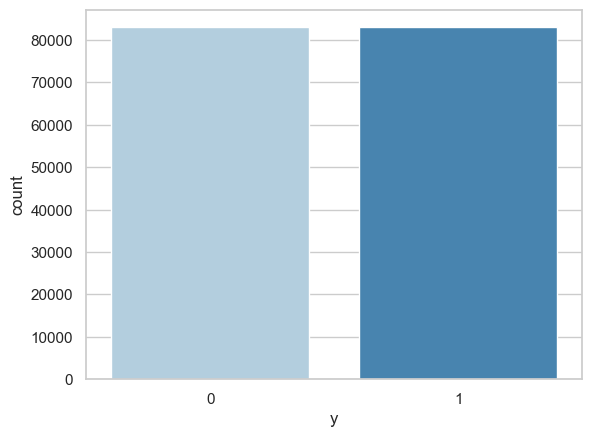

In [1485]:
sns.countplot(x=y_new, palette="Blues")
plt.show()

### Logistic Regression with feature engineering

##### data train test split for Logistic Regression 

In [1499]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)

#### Recursive Feature Elimination

In [1500]:
X_train.columns.size

22

 since we have only 22 columns, not specifying n_features_to_select. Half of the features will be selected by default

In [1501]:
#Use Recursive Feature Elimination
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)

In [1502]:
# checking RFE Supported feature
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False])

In [1503]:
# listing RFE supported Features along with their Ranking/Priority of selection.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('C1', False, 8),
 ('banner_pos', True, 1),
 ('site_id', True, 1),
 ('site_domain', True, 1),
 ('site_category', True, 1),
 ('app_id', True, 1),
 ('app_domain', True, 1),
 ('app_category', True, 1),
 ('device_id', True, 1),
 ('device_ip', True, 1),
 ('device_model', True, 1),
 ('device_conn_type', True, 1),
 ('C15', False, 4),
 ('C16', False, 5),
 ('C17', False, 9),
 ('C18', False, 3),
 ('C19', False, 11),
 ('C20', False, 12),
 ('C21', False, 7),
 ('dayofweek', False, 2),
 ('day', False, 6),
 ('hour', False, 10)]

In [1504]:
# Assigning RFE Supported variable to col variable
cols = X_train.columns[rfe.support_]
cols

Index(['banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model',
       'device_conn_type'],
      dtype='object')

In [1505]:
# Listing columns not Supported by RFE
X_train.columns[~rfe.support_]

Index(['C1', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'dayofweek',
       'day', 'hour'],
      dtype='object')

In [1506]:
X_train = X_train[cols]
X_test = X_test[cols]
print(X_train.columns.size)
print(X_test.columns.size)

11
11


In [1507]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()


,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_conn_type
138890,0.14,0.30,0.29,0.30,0.20,0.32,0.75,0.22,0.17,0.20,0.00
12154,0.00,0.12,0.14,0.22,0.06,0.11,0.40,0.22,0.17,0.32,0.00
16971,0.00,0.12,0.14,0.22,0.09,0.23,0.36,0.22,0.17,0.31,0.40
114504,0.14,0.30,0.29,0.30,0.20,0.32,0.75,0.22,0.51,0.20,0.00
24685,0.00,0.12,0.14,0.22,0.13,0.18,0.40,0.22,0.17,0.13,0.00


In [1508]:

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               116226
Model:                            GLM   Df Residuals:                   116214
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63075.
Date:                Sat, 18 Feb 2023   Deviance:                   1.2615e+05
Time:                        13:07:48   Pearson chi2:                 2.05e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2599
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.4735      0.097    -46.321      0.000      -4.663      -4.284
banner_pos           0.6525      0.104      6.254      0.000       0.448       0.857
site_id              3.0013      0.164     18.283      0.000       2.680       3.323
site_domain          2.9741      0.163     18.223      0.000       2.654       3.294
site_category       -0.4883      0.114     -4.268      0.000      -0.713      -0.264
app_id               9.7173      0.180     53.905      0.000       9.364      10.071
app_domain          -2.0790      0.153    -13.565      0.000      -2.379      -1.779
app_category        -1.3394      0.058    -22.932      0.000      -1.454      -1.225
device_id            3.2096      0.390      8.219      0.000       2.444       3.975
device_ip            7.7578      0.102     76.234      0.000       7.558       7.957
device_model         4.3509      0.089     48.644      0.000       4.176       4.526
device_conn_type     0.2665      0.054      4.954      0.000       0.161       0.372
====================================================================================
"""

In [1509]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'y':y_train, 'y_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

[[42812 15301]
 [17547 40566]]
0.7173782114156901


In [1510]:
def sm_model_evaluation (model, x_test, y_test):
    X_sm = sm.add_constant(x_test)
    y_pred = res.predict(X_sm)
    y_train_pred_final = pd.DataFrame({'y':y_test, 'y_Prob':y_pred})
    y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))
    confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
    print(confusion)

In [1511]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
sm_model_evaluation(res, X_test, y_test)  

0.7174977916967799
[[18348  6558]
 [ 7514 17392]]


In [1512]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.45
2,site_id,6.47
3,site_domain,6.10
6,app_domain,1.83
7,app_category,1.73
4,site_category,1.64
5,app_id,1.56
10,device_model,1.27
11,device_conn_type,1.24
8,device_id,1.23


    # p-values are stable. Checking VIF values we can delete site_id

In [1513]:
X_train_sm.drop(['site_id'], axis=1, inplace= True)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               116226
Model:                            GLM   Df Residuals:                   116215
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63251.
Date:                Sat, 18 Feb 2023   Deviance:                   1.2650e+05
Time:                        13:08:57   Pearson chi2:                 2.10e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2576
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.7286      0.088    -53.772      0.000      -4.901      -4.556
banner_pos           0.6412      0.104      6.173      0.000       0.438       0.845
site_domain          5.6507      0.075     75.303      0.000       5.504       5.798
site_category       -0.5430      0.114     -4.765      0.000      -0.766      -0.320
app_id               9.5425      0.179     53.249      0.000       9.191       9.894
app_domain          -1.9968      0.153    -13.019      0.000      -2.297      -1.696
app_category        -1.2577      0.058    -21.641      0.000      -1.372      -1.144
device_id            4.0288      0.347     11.627      0.000       3.350       4.708
device_ip            7.8710      0.102     77.179      0.000       7.671       8.071
device_model         4.5699      0.089     51.470      0.000       4.396       4.744
device_conn_type     0.2631      0.054      4.887      0.000       0.158       0.369
====================================================================================
"""

In [1514]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.53
5,app_domain,1.83
6,app_category,1.73
3,site_category,1.62
4,app_id,1.55
2,site_domain,1.37
9,device_model,1.24
10,device_conn_type,1.24
1,banner_pos,1.07
8,device_ip,1.05


#### Now the parameters look good. Let's fit the model and check.
    

In [1515]:
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'y':y_train, 'y_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

[[42597 15516]
 [17583 40530]]
0.7152186257808063


In [1516]:
col = list(X_train_sm.columns)
col.remove('const')
sm_model_evaluation(res, X_test[col], y_test)  

0.7144262426724484
[[18226  6680]
 [ 7545 17361]]


In [1517]:
numbers = [float(x)/20 for x in range(20)]
print(numbers)
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.y_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
138890,1,0.57,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
12154,0,0.38,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
16971,0,0.41,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
114504,1,0.95,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
24685,0,0.31,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1518]:
cutoff_df = pd.DataFrame( columns = ['Thresold_prob','accuracy','recall','precision'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    accuracy = (TP + TN)/total1
    
    recall = TP / (TP+FP)
    precision = TP / (TP+FN)
    cutoff_df.loc[i] =[ i ,accuracy,recall,precision]
cutoff_df

,Thresold_prob,accuracy,recall,precision
0.00,0.00,0.50,0.50,1.00
0.05,0.05,0.51,0.51,1.00
0.10,0.10,0.54,0.52,1.00
0.15,0.15,0.58,0.55,0.99
0.20,0.20,0.62,0.57,0.98
0.25,0.25,0.65,0.60,0.96
0.30,0.30,0.68,0.62,0.93
0.35,0.35,0.70,0.65,0.89
0.40,0.40,0.72,0.67,0.85
0.45,0.45,0.72,0.70,0.78


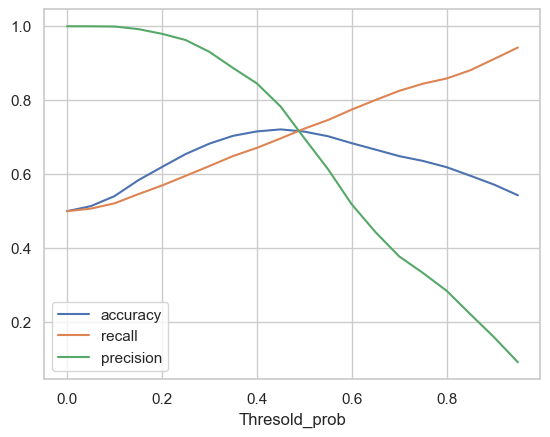

In [1519]:
cutoff_df.plot.line(x='Thresold_prob', y=['accuracy','recall','precision'])
plt.show()

#### To get good accuracy, recall and precision the cut off value is around 0.5

In [1520]:
y_train_pred_final['final_predicted'] = y_train_pred_final.y_Prob.map( lambda x: 1 if x > 0.50 else 0)
y_train_pred_final.head()

,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
138890,1,0.57,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1
12154,0,0.38,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
16971,0,0.41,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
114504,1,0.95,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
24685,0,0.31,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1521]:
X_train_sm.drop('const', axis= 1, inplace= True)
X_test = X_test[X_train_sm.columns]
print(X_train_sm.shape)
print(X_test.shape)

(116226, 10)
(49812, 10)


#### Logistic Regression with Feature Engineering

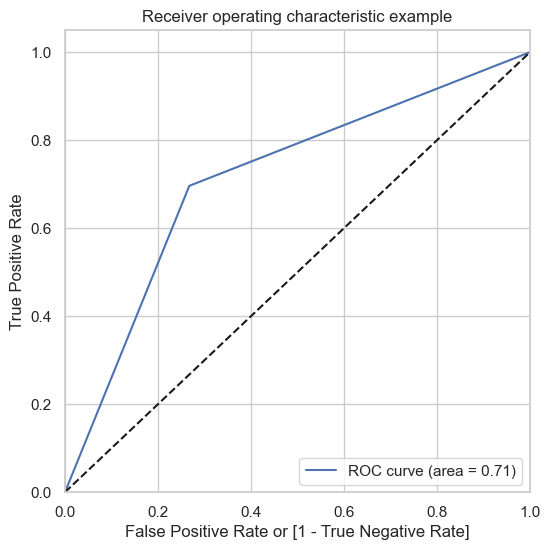

,model_name,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test,cross_val_mean,cross_val_1,cross_val_2,cross_val_3,cross_val_4,cross_val_5
0,Logistic Regression,0.72,0.72,0.71,0.72,0.72,0.71,0.72,0.72,0.72,0.72,0.72,0.72
0,Decision Tree,0.90,0.85,0.97,0.90,0.85,0.97,0.88,0.88,0.88,0.88,0.88,0.88
0,Random Forest,0.92,0.87,0.98,0.92,0.87,0.98,0.89,0.90,0.89,0.89,0.90,0.89
0,logistic reg with feature engine,0.71,0.72,0.70,0.71,0.72,0.70,0.72,0.71,0.71,0.72,0.72,0.71


In [1522]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_sm, y_train)
accuracy, cnf_matrix = model_evaluation(model, X_test[X_train_sm.columns], y_test)
model_eval_df = get_eval_score_df_entry("logistic reg with feature engine", y_train, X_train_sm, y_test, X_test[X_train_sm.columns],
                     model, 5)
plot_roc(model, X_test[X_train_sm.columns], y_test)
model_eval_scores = model_eval_scores.append(model_eval_df)
model_eval_scores

### Decision Tree with Feature Engineering
    Let's get train test split data from x_new and y_new since in above model few columns are deleted in feature selection process
    We use a separate feature selection for Decision Tree

In [1523]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)
X_train.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_conn_type,C15,C16,C17,C18,C19,C20,C21,dayofweek,day,hour
138890,1005,1,0.30,0.26,0.18,0.20,0.19,0.20,0.17,0.17,0.18,0,320,50,423,2,39,100148,32,3,23,2
12154,1005,0,0.12,0.13,0.13,0.06,0.06,0.11,0.17,0.17,0.29,0,320,50,2726,3,803,100199,229,3,30,4


In [1524]:
dt_tree = DecisionTreeClassifier(random_state=42)
dt_tree.fit(X_train, y_train)
feature_importances = dt_tree.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df.sort_values(by='importance', ascending = False)

,features,importance
10,device_model,0.18
9,device_ip,0.16
21,hour,0.16
2,site_id,0.13
5,app_id,0.07
17,C20,0.05
20,day,0.05
19,dayofweek,0.05
14,C17,0.04
3,site_domain,0.02


In [1525]:
#### Filter features with significant feature importance
df = df[df.importance > 0.02]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df.features):
        rf_cols.append(col)

rf_cols

['site_id',
 'site_domain',
 'app_id',
 'device_ip',
 'device_model',
 'C17',
 'C19',
 'C20',
 'C21',
 'dayofweek',
 'day',
 'hour']

In [1526]:
#### Decision Tree
dt_tree = DecisionTreeClassifier(random_state=42)
dt_tree.fit(X_train[rf_cols], y_train)

DecisionTreeClassifier(random_state=42)

In [1527]:
print(rf_cols)
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]
print(len(rf_cols))
predict_rf = dt_tree.predict(X_train)
predict_rf_test = dt_tree.predict(X_test)

['site_id', 'site_domain', 'app_id', 'device_ip', 'device_model', 'C17', 'C19', 'C20', 'C21', 'dayofweek', 'day', 'hour']
12


In [1528]:
accuracy, cnf_matrix = model_evaluation(dt_tree, X_train, y_train)
print("Metrics for Train results")
print("accuracy",accuracy)
print("cnf_matrix \n",cnf_matrix)


Metrics for Train results
accuracy 0.990028048801473
cnf_matrix 
 [[57167   946]
 [  213 57900]]


In [1529]:
accuracy, cnf_matrix = model_evaluation(dt_tree, X_test, y_test)
print("Metrics for Test results")
print("accuracy",accuracy)
print("cnf_matrix \n",cnf_matrix)

Metrics for Test results
accuracy 0.8988597125190717
cnf_matrix 
 [[20502  4404]
 [  634 24272]]


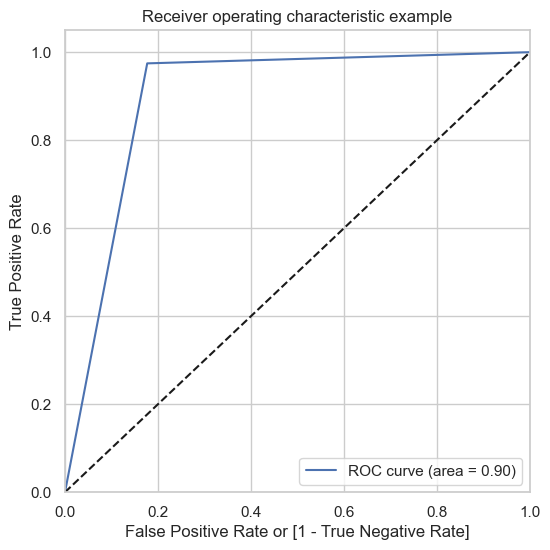

(array([0.        , 0.17682486, 1.        ]),
 array([0.        , 0.97454429, 1.        ]),
 array([2, 1, 0]))

In [1530]:
# Plot the ROC Curve
plot_roc(dt_tree, X_test, y_test)

#### Above metrics show that the Decision Tree is overfitting. We can take a look at hyperparameter tuning
    We can make use of grid search cross validation for finding best hyperparameters

In [1531]:
param_grid = {
    'max_depth': range(1,15),
    'min_samples_leaf': range(10,200,20),
    'min_samples_split': range(50, 150, 50)
    
}
n_folds = 5
dt_model_gs = DecisionTreeClassifier(random_state= 42)
dt_est_model = GridSearchCV(dt_model_gs, param_grid, cv=n_folds, n_jobs =-1,return_train_score=True)
dt_est_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 15),
                         'min_samples_leaf': range(10, 200, 20),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True)

In [1532]:
# Print best parameters and estimators

In [1533]:
dt_est_model.best_params_

{'max_depth': 14, 'min_samples_leaf': 10, 'min_samples_split': 50}

In [1534]:
dt_est_model.best_estimator_

DecisionTreeClassifier(max_depth=14, min_samples_leaf=10, min_samples_split=50,
                       random_state=42)

#### Decision Tree with tuned best hyperparameters

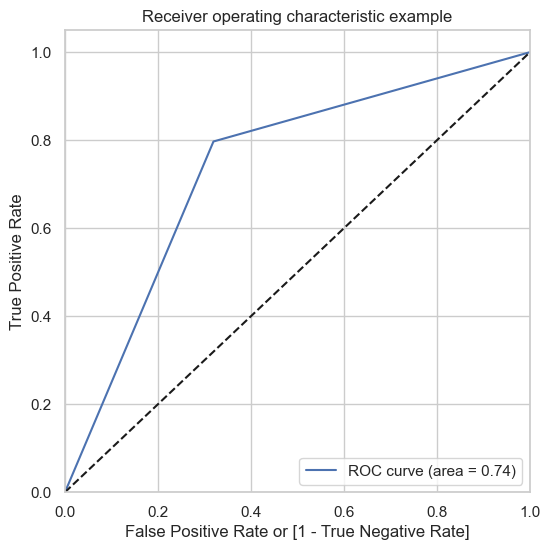

,model_name,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test,cross_val_mean,cross_val_1,cross_val_2,cross_val_3,cross_val_4,cross_val_5
0,Logistic Regression,0.72,0.72,0.71,0.72,0.72,0.71,0.72,0.72,0.72,0.72,0.72,0.72
0,Decision Tree,0.90,0.85,0.97,0.90,0.85,0.97,0.88,0.88,0.88,0.88,0.88,0.88
0,Random Forest,0.92,0.87,0.98,0.92,0.87,0.98,0.89,0.90,0.89,0.89,0.90,0.89
0,logistic reg with feature engine,0.71,0.72,0.70,0.71,0.72,0.70,0.72,0.71,0.71,0.72,0.72,0.71
0,Decision Tree - Feature Engineering and Hyperp...,0.90,0.85,0.97,0.90,0.85,0.97,0.88,0.88,0.88,0.88,0.88,0.88


In [1535]:
dt_model_new =  DecisionTreeClassifier(max_depth=14, min_samples_leaf=10, min_samples_split=50,
                       random_state=42)
dt_model_new.fit(X_train, y_train)
accuracy, cnf_matrix = model_evaluation(dt_model_new, X_test, y_test)
model_eval_df = get_eval_score_df_entry("Decision Tree - Feature Engineering and Hyperparameter Tuning", y_train, X_train, y_test, X_test, \
                     dt_tree, 5)
plot_roc(dt_model_new, X_test, y_test)
model_eval_scores = model_eval_scores.append(model_eval_df)
model_eval_scores

### Random Forest with Feature Engineering
    Let's get train test split data from x_new and y_new since in above model few columns are deleted in feature selection process
    We use a separate feature selection for Decision Tree

In [1536]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, stratify= y_new, test_size= 0.3, random_state= 42)
X_train.head(2)

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_conn_type,C15,C16,C17,C18,C19,C20,C21,dayofweek,day,hour
138890,1005,1,0.30,0.26,0.18,0.20,0.19,0.20,0.17,0.17,0.18,0,320,50,423,2,39,100148,32,3,23,2
12154,1005,0,0.12,0.13,0.13,0.06,0.06,0.11,0.17,0.17,0.29,0,320,50,2726,3,803,100199,229,3,30,4


In [1537]:
rf_model_fe = RandomForestClassifier(random_state=42)
rf_model_fe.fit(X_train, y_train)
feature_importances = rf_model_fe.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df.sort_values(by='importance', ascending = False)

,features,importance
10,device_model,0.21
21,hour,0.16
9,device_ip,0.14
2,site_id,0.08
3,site_domain,0.05
5,app_id,0.05
17,C20,0.05
20,day,0.05
19,dayofweek,0.04
14,C17,0.04


In [1538]:
#### Filter features with significant feature importance
df = df[df.importance > 0.02]
rf_cols = []
for col in list(X_train.columns):
    if col in list(df.features):
        rf_cols.append(col)

rf_cols

['site_id',
 'site_domain',
 'app_id',
 'device_ip',
 'device_model',
 'C17',
 'C19',
 'C20',
 'C21',
 'dayofweek',
 'day',
 'hour']

In [1539]:
X_train = X_train[rf_cols]
X_test = X_test[rf_cols]

#### Use these features and build the Random Forest Classifier Model

Train results
accuracy 0.990028048801473
cnf_matrix 
 [[57100  1013]
 [  146 57967]]
Test results
accuracy 0.9160041757006344
cnf_matrix 
 [[21248  3658]
 [  526 24380]]


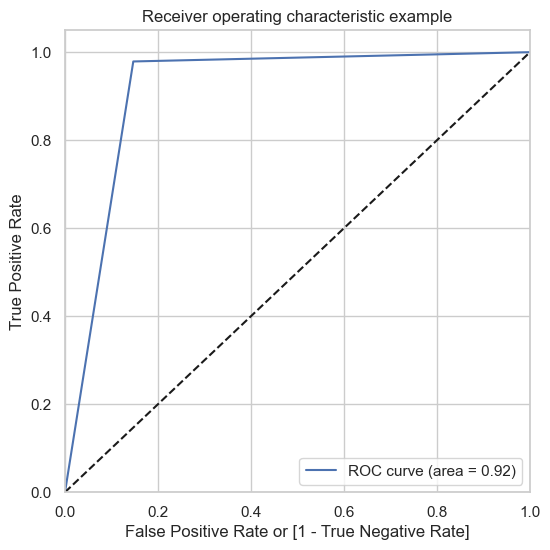

(array([0.        , 0.14687224, 1.        ]),
 array([0.        , 0.97888059, 1.        ]),
 array([2, 1, 0]))

In [1540]:
rf_model_new = RandomForestClassifier(random_state=42)
rf_model_new.fit(X_train, y_train)

predict_rf = rf_model_new.predict(X_train)
predict_rf_test = rf_model_new.predict(X_test)

accuracy, cnf_matrix = model_evaluation(rf_model_new, X_train, y_train)
print("Train results")
print("accuracy",accuracy)
print("cnf_matrix \n", cnf_matrix)

accuracy, cnf_matrix = model_evaluation(rf_model_new, X_test, y_test)
print("Test results")
print("accuracy",accuracy)
print("cnf_matrix \n", cnf_matrix)

model_eval_df = get_eval_score_df_entry("Random Forest -  Feature Engineering", y_train, X_train, y_test, X_test, rf_model_new, 5)
model_eval_scores = model_eval_scores.append(model_eval_df)

plot_roc(rf_model_new, X_test, y_test)

In [1541]:
model_eval_scores

,model_name,accuracy_train,recall_train,precision_train,accuracy_test,recall_test,precision_test,cross_val_mean,cross_val_1,cross_val_2,cross_val_3,cross_val_4,cross_val_5
0,Logistic Regression,0.72,0.72,0.71,0.72,0.72,0.71,0.72,0.72,0.72,0.72,0.72,0.72
0,Decision Tree,0.90,0.85,0.97,0.90,0.85,0.97,0.88,0.88,0.88,0.88,0.88,0.88
0,Random Forest,0.92,0.87,0.98,0.92,0.87,0.98,0.89,0.90,0.89,0.89,0.90,0.89
0,logistic reg with feature engine,0.71,0.72,0.70,0.71,0.72,0.70,0.72,0.71,0.71,0.72,0.72,0.71
0,Decision Tree - Feature Engineering and Hyperp...,0.90,0.85,0.97,0.90,0.85,0.97,0.88,0.88,0.88,0.88,0.88,0.88
0,Random Forest - Feature Engineering,0.92,0.87,0.98,0.92,0.87,0.98,0.89,0.90,0.90,0.89,0.90,0.89


### 8. After building the best model possible, explain the risks associated with adopting the model to the business team (You can create a 3-5 slide presentation)

    Interpret the evaluation metric of choice 
    Explain the implications of errors made in the prediction by the model.

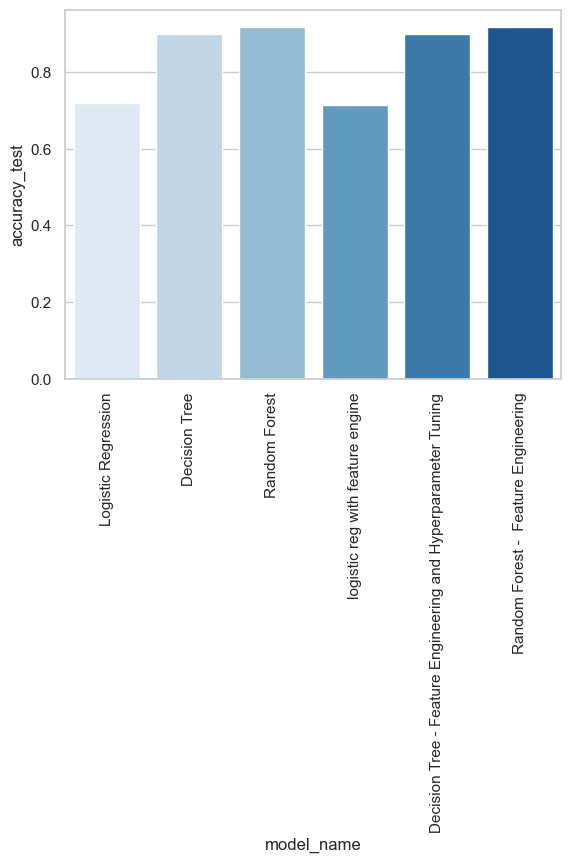

In [1542]:
plt.xticks(rotation=90)
sns.barplot(x="model_name", y="accuracy_test", data=model_eval_scores, palette="Blues")
plt.show()

#### Confusion metrics for the best model

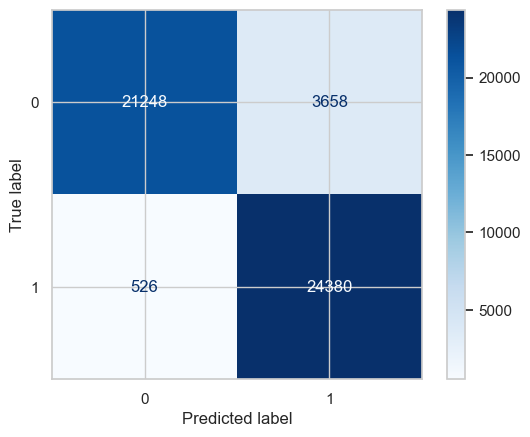

In [1543]:
ConfusionMatrixDisplay.from_estimator(rf_model_new, X_test, y_test,cmap=plt.cm.Blues);

### Observations related to data

- The banner position variable in the dataset is highly imbalanced. 71,778 addvertisements are in position zero. 28,052 advertisements are in position 1.
    Position 0 has 59,913 clicks and 11,865 no clicks of total 71,778. Position 1 has 22,978 clicks and  5,074 non clicked ads

- Mostly used device_type is 1.
    This device_type 1 has lead to majority of advertisements of around 87,000 with 76688 clicked and 15551 non clicked

- Connection Type 0 is majorly used and most of the clicks came from connection type 0


- Most of the clicks are coming from C1 Category counting 91862

- Most of the clicks are coming on weekdays Monday, Tuesday and Wednesday

- C16 Category has most of the clicks comign from type 50


- C15 Category has most of the clicks comign from type 320


- The successful clicks are consistent across days


- Most of the ads are clicked during 8AM to 5PM

### Model Comparison on different evaluation metrics

    From the metrics we can see that among all the models the Random Forest is the best performing classifier. 
    Although Random Forest with Feaure Enginnering and without feature engineering may apear to be performing the same but the random forest classifier with feaures engineering is best fitted for both training and test data.
    
    Decision Tree and Logistic Regression are performing with comparatively low accuracy, precision, recall and in cross validaiton.
    Hence it is reccomended that in this use case the random forest classifier should be used to get more accurate results. Business can rely on the prediction made by random forest. 
    
    Below are the most important features that can influence the click through rate
     - 'site_id'
     - 'site_domain'
     - 'app_id'
     - 'device_ip'
     - 'device_model'
     - 'C17'
     - 'C19'
     - 'C20'
     - 'C21'
     - 'dayofweek'
     - 'day'
     - 'hour'
     
    Business should be careful in choosing the site and it's domain. An advertisement click through rate could very much be affected by the kind of content on the website that the user is looking at. The kind of advertisement should be put based on the device model. Imagine showing advertisement of a very high cost product on a very simple and low cost device model. The user of such device may not be interest to buying expensive or luxury items.
    
    It is also observed that the hours including daysofweek and day are also contributing to important feature for click throught rate. Business can take into account target audience schedule to place the advertisement to have better click through rate.
    
    Above all, when business can provide the input for the most significant features we have model which will predict the click through rate with 92% accuracy.
    
    It will help business to target the advertisement to maximize the click through rate.

### The risks associated with adopting the model to the business team
    Since we decided that we'll choose the Random Forest as our model let's see the implication of the error made by the model. Please refer "Confusion metrics for the best model" plotted above.
    
    In this use case False Negative is minimized leading to very minimum loss of business due to not focusing on the ads which could have turned positive. The 526 count of False Negative out of 49812 total records is equivalent to 1 percent is very minimal.
    
    There are around 3658 False Positive which is 7.3 percent and could lead to minimum loss in the investment on the advertisements which may not turn positive.
    
    Overall the model leads to very minimal loss of business and enables business to target ads for mamimum click through rate and return for the investment.

#### Also please refer to attached slide presentation

-------------------------------------- Completed -------------------------------------